In [1]:
from json import load
import numpy as np
from matplotlib import pyplot as plt

In [11]:
%pip install brokenaxes


You should consider upgrading via the '/ssd/scratch/kellner/miniconda3/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
with open("errors_RR_6_6.json","r") as fg:
    result_6_6 = load(fg)
with open("errors_RR_8_8.json","r") as fg:
    result_8_8 = load(fg)

In [3]:
with open("errors_bare_sigma.json") as fg:
    bare_error = load(fg)
with open("errors_dia_sigma.json") as fg:
    dia_error = load(fg)
with open("errors_para_lq.json") as fg:
    para_lq_error = load(fg)
with open("errors_para_oo.json") as fg:
    para_oo_error = load(fg)
with open("errors_shape_contribution.json") as fg:
    shape_error = load(fg)
with open("errors_para_sigma.json") as fg:
    para_error = load(fg)
with open("errors_core.json") as fg:
    core_error = load(fg)    

In [4]:
results_contributions = {1:{},6:{},7:{},8:{}}
results_contributions_err = {1:{},6:{},7:{},8:{}}


for name, contrib in zip(["bare","dia","para_lq","para_oo","shape","para"],[bare_error,dia_error,para_lq_error,para_oo_error,shape_error,para_error]):
    for specie in [1,6,7,8]:
        results_contributions[specie][name] = np.mean(np.array(contrib[str(specie)]['rmse_test']).reshape(-1,5),axis=1)
        results_contributions_err[specie][name] = np.std(np.array(contrib[str(specie)]['rmse_test']).reshape(-1,5),axis=1)
        

In [37]:
results_contributions.items()

dict_items([(1, {'bare': array([1.12734925, 0.99998676, 0.89750853, 0.80362966, 0.7418605 ,
       0.68821396, 0.63607895, 0.59111084]), 'dia': array([0.0121336 , 0.0097673 , 0.0083498 , 0.00729529, 0.00767786,
       0.00573792, 0.00493559, 0.00459747]), 'para_lq': array([0., 0., 0., 0., 0., 0., 0., 0.]), 'para_oo': array([0., 0., 0., 0., 0., 0., 0., 0.]), 'shape': array([0.43340271, 0.46416472, 0.40641112, 0.39496436, 0.39389497,
       0.3791356 , 0.37414492, 0.36211037]), 'para': array([0., 0., 0., 0., 0., 0., 0., 0.])}), (6, {'bare': array([6.10346874, 5.3038554 , 4.19851097, 3.58975152, 3.17297929,
       2.85274134, 2.57849995, 2.34737156]), 'dia': array([0.03421851, 0.02886774, 0.0249813 , 0.02190069, 0.01864203,
       0.01675977, 0.01467576, 0.01333583]), 'para_lq': array([0.34255311, 0.2515123 , 0.21544395, 0.17897762, 0.15661378,
       0.14004485, 0.12855316, 0.11629196]), 'para_oo': array([0.0756024 , 0.05868758, 0.05148417, 0.04267624, 0.03740304,
       0.03371411, 0.03

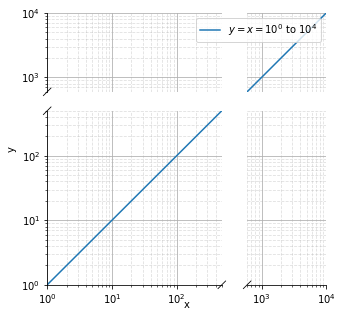

In [12]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import numpy as np

fig = plt.figure(figsize=(5, 5))
bax = brokenaxes(xlims=((1, 500), (600, 10000)),
	     ylims=((1, 500), (600, 10000)),
		 hspace=.15, xscale='log', yscale='log')

x = np.logspace(0.0, 4, 100)
bax.loglog(x, x, label='$y=x=10^{0}$ to $10^{4}$')

bax.legend(loc='best')
bax.grid(axis='both', which='major', ls='-')
bax.grid(axis='both', which='minor', ls='--', alpha=0.4)
bax.set_xlabel('x')
bax.set_ylabel('y')
plt.show()

In [5]:
points = np.array([25,50,100,200,400,800,1600,3200])

In [ ]:
fig = plt.figure(figsize=(5, 5))
bax = brokenaxes(xlims=((1, 500), (600, 10000)),
	     ylims=((1, 500), (600, 10000)),
		 hspace=.15, xscale='log', yscale='log')

x = np.logspace(0.0, 4, 100)
bax.loglog(x, x, label='$y=x=10^{0}$ to $10^{4}$')

bax.legend(loc='best')
bax.grid(axis='both', which='major', ls='-')
bax.grid(axis='both', which='minor', ls='--', alpha=0.4)
bax.set_xlabel('x')
bax.set_ylabel('y')
plt.show()

In [ ]:
bax.

Text(0.5, 1.0, '$^{1}$H $\\sigma_{iso}$ components learning curve')

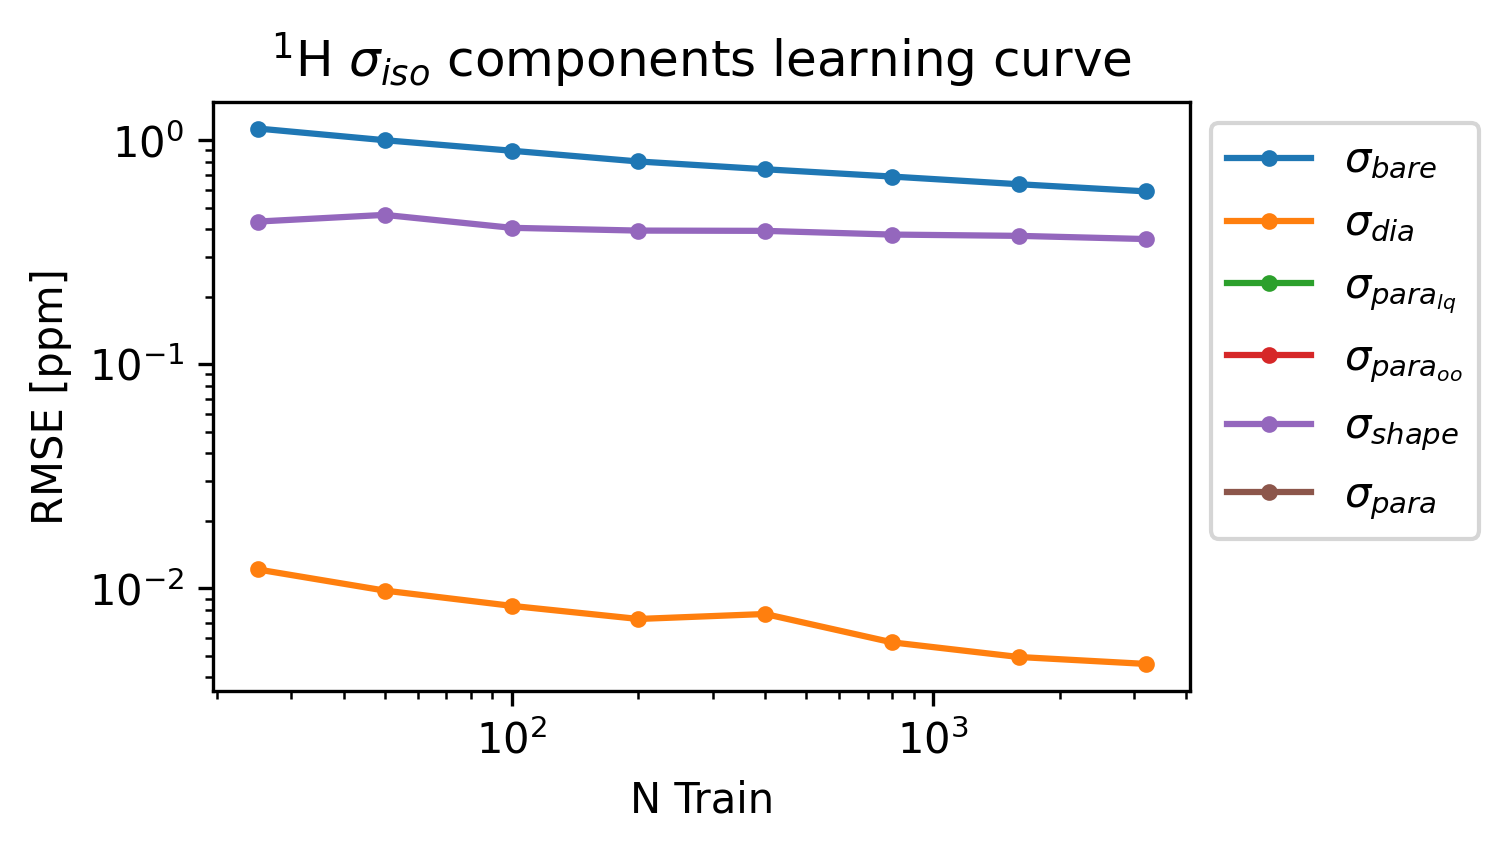

In [17]:
plt.figure(figsize=(4.2,2.6),dpi=300)

#plt.errorbar(points,N_RBF,yerr=N_RBF_err,marker="o",label="KRR RBF",capsize=3,c="tab:orange")
#plt.errorbar(points,N_NN,yerr=N_NN_err,marker="o",label="NN",capsize=3,c="tab:blue")
specie = 1

"""bax = brokenaxes(xlims=((1, 500), (600, 10000)),
	     ylims=((1, 500), (600, 10000)),
		 hspace=.15, xscale='log', yscale='log')"""

for name, contrib in results_contributions[specie].items():
    if name == "para_lq":
        plt.plot(points,contrib,label="$\sigma_{para_{lq}}$",marker="o",markersize=3)
    elif name == "para_oo":
        plt.plot(points,contrib,label="$\sigma_{para_{oo}}$",marker="o",markersize=3)
    else:
        plt.plot(points,contrib,label="$\sigma_{" + name.replace("_","") + "}$",marker="o",markersize=3)

        
plt.plot()
#,label="RR")
#plt.plot(points,N_RR_8,marker="o")

plt.xscale("log")
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.ylabel("RMSE [ppm]")
plt.xlabel("N Train")
plt.title("$^{1}$H $\sigma_{iso}$ components learning curve")
#plt.savefig("learning_curve_components_H1",bbox_inches="tight",dpi=300)

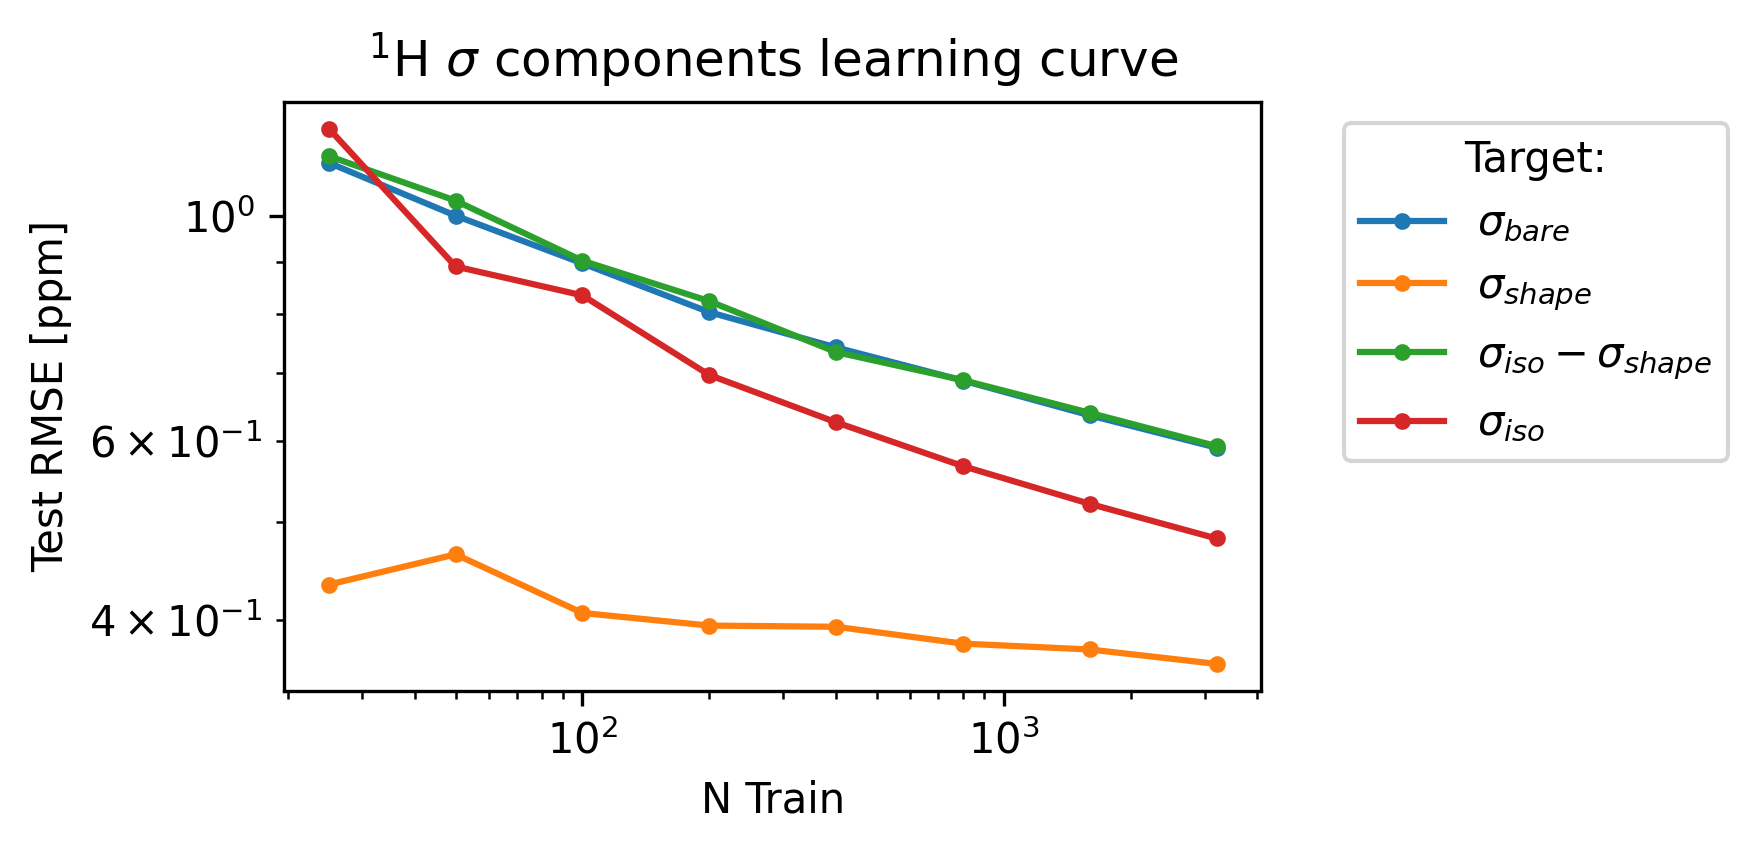

In [38]:
plt.figure(figsize=(4.2,2.6),dpi=300)

#plt.errorbar(points,N_RBF,yerr=N_RBF_err,marker="o",label="KRR RBF",capsize=3,c="tab:orange")
#plt.errorbar(points,N_NN,yerr=N_NN_err,marker="o",label="NN",capsize=3,c="tab:blue")
specie = 1

"""bax = brokenaxes(xlims=((1, 500), (600, 10000)),
	     ylims=((1, 500), (600, 10000)),
		 hspace=.15, xscale='log', yscale='log')"""

for name, contrib in results_contributions[specie].items():
    if name in ["dia","para_lq","para_oo","para"]:
        pass
        #plt.plot(points,contrib,label="$\sigma_{para_{lq}}$",marker="o",markersize=3)
        #plt.plot(points,contrib,label="$\sigma_{para_{oo}}$",marker="o",markersize=3)
    else:
        plt.plot(points,contrib,label="$\sigma_{" + name.replace("_","") + "}$",marker="o",markersize=3)

        
plt.plot(points,H_RR_8_wo_shape,label="$\sigma_{iso} - \sigma_{shape}$",marker="o",markersize=3)
plt.plot(points,H_RR_8,marker="o",markersize=3)
#,label="RR")
#plt.plot(points,N_RR_8,marker="o")

plt.xscale("log")
plt.yscale("log")
plt.legend(title="Target:",labels=["$\sigma_{bare}$","$\sigma_{shape}$","$\sigma_{iso} - \sigma_{shape}$","$\sigma_{iso}$"],bbox_to_anchor=(1.5, 1.0))
plt.ylabel("Test RMSE [ppm]")
plt.xlabel("N Train")
plt.title("$^{1}$H $\sigma$ components learning curve")
#plt.savefig("learning_curve_components_H1_remove_shape",bbox_inches="tight",dpi=300)

Text(0.5, 1.0, '$^{13}$C $\\sigma$ components learning curve')

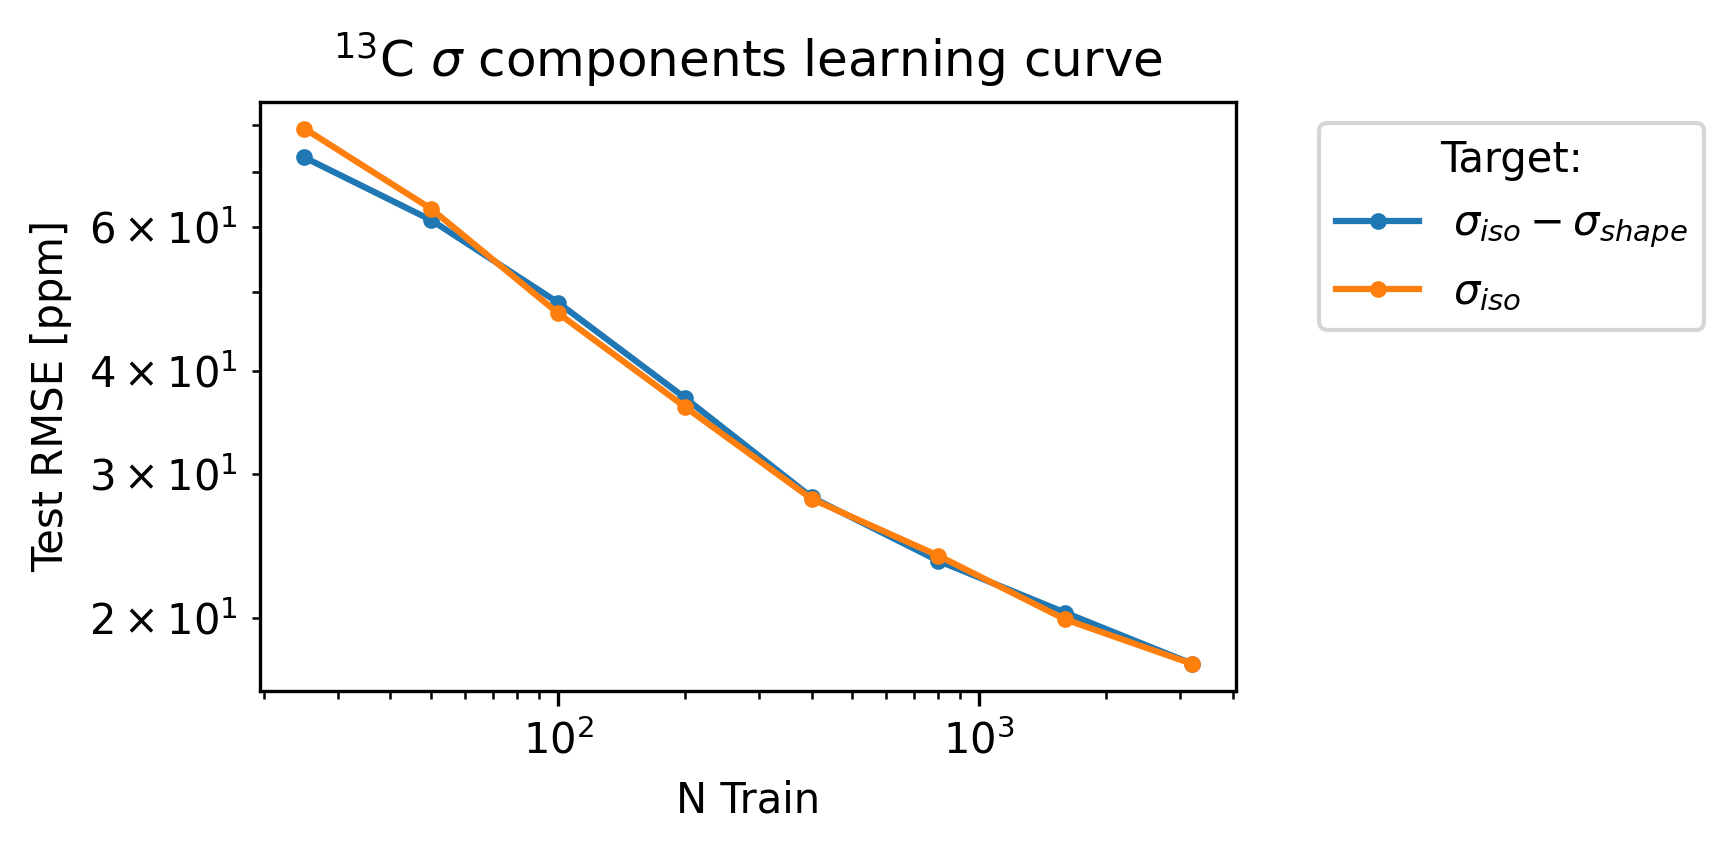

In [47]:
plt.figure(figsize=(4.2,2.6),dpi=300)

#plt.errorbar(points,N_RBF,yerr=N_RBF_err,marker="o",label="KRR RBF",capsize=3,c="tab:orange")
#plt.errorbar(points,N_NN,yerr=N_NN_err,marker="o",label="NN",capsize=3,c="tab:blue")
specie = 8

"""bax = brokenaxes(xlims=((1, 500), (600, 10000)),
	     ylims=((1, 500), (600, 10000)),
		 hspace=.15, xscale='log', yscale='log')"""
"""
for name, contrib in results_contributions[specie].items():
    if name in ["dia","para_lq","para_oo","para"]:
        pass
        #plt.plot(points,contrib,label="$\sigma_{para_{lq}}$",marker="o",markersize=3)
        #plt.plot(points,contrib,label="$\sigma_{para_{oo}}$",marker="o",markersize=3)
    else:
        plt.plot(points,contrib,label="$\sigma_{" + name.replace("_","") + "}$",marker="o",markersize=3)

"""      
plt.plot(points,O_RR_8_wo_shape,label="$\sigma_{iso} - \sigma_{shape}$",marker="o",markersize=3)
plt.plot(points,O_RR_8,marker="o",markersize=3)
#,label="RR")
#plt.plot(points,N_RR_8,marker="o")

plt.xscale("log")
plt.yscale("log")
plt.legend(title="Target:",labels=["$\sigma_{iso} - \sigma_{shape}$","$\sigma_{iso}$"],bbox_to_anchor=(1.5, 1.0))
plt.ylabel("Test RMSE [ppm]")
plt.xlabel("N Train")
plt.title("$^{13}$C $\sigma$ components learning curve")
#plt.savefig("learning_curve_components_H1_remove_shape",bbox_inches="tight",dpi=300)

Text(0.5, 1.0, '$^{13}$C $\\sigma_{iso}$ learning curve')

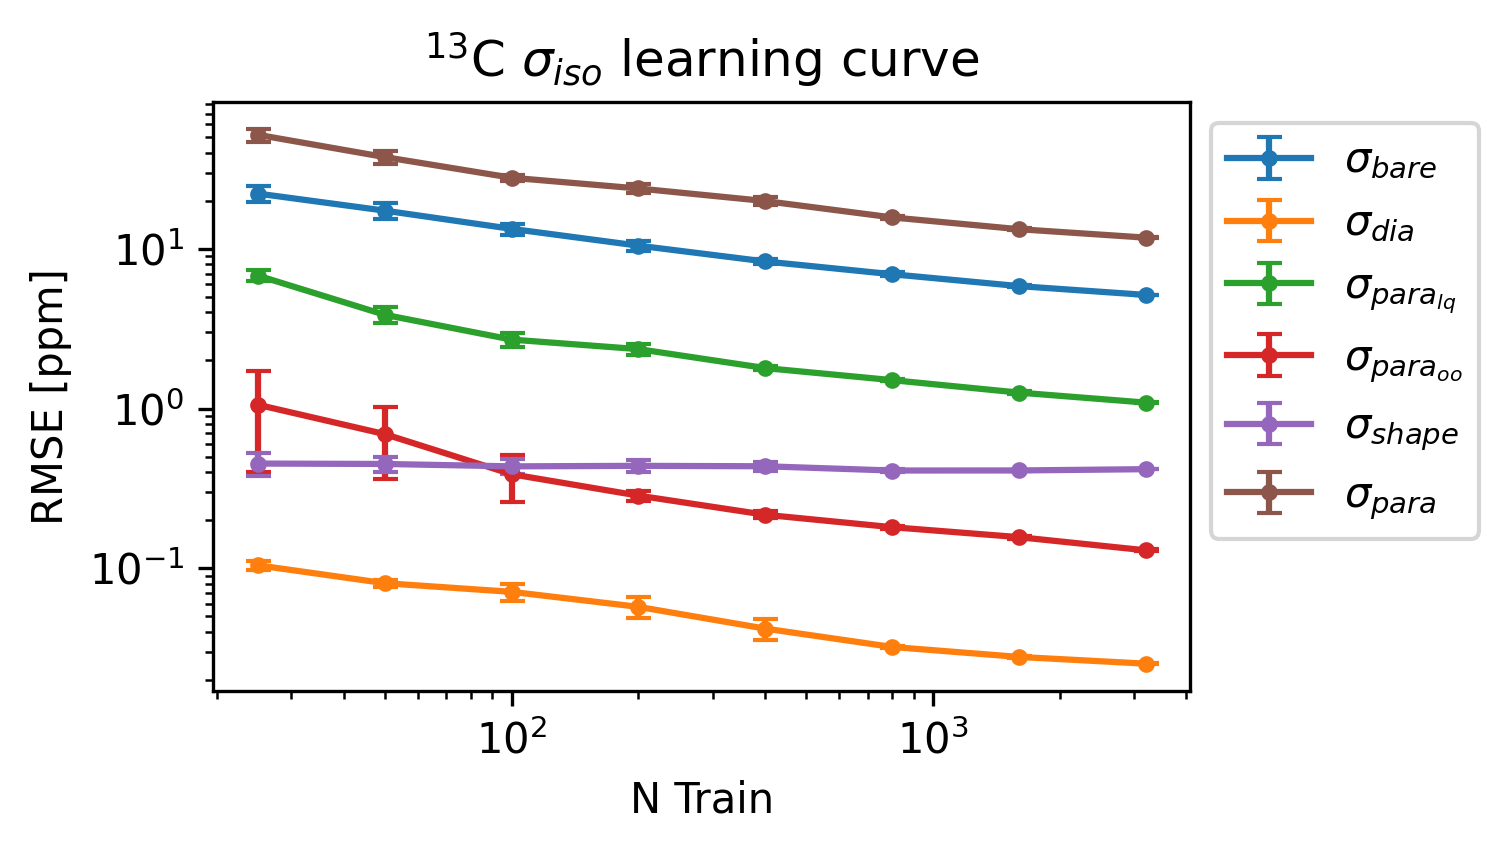

In [15]:
plt.figure(figsize=(4.2,2.6),dpi=300)

#plt.errorbar(points,N_RBF,yerr=N_RBF_err,marker="o",label="KRR RBF",capsize=3,c="tab:orange")
#plt.errorbar(points,N_NN,yerr=N_NN_err,marker="o",label="NN",capsize=3,c="tab:blue")
specie = 8

"""bax = brokenaxes(xlims=((1, 500), (600, 10000)),
	     ylims=((1, 500), (600, 10000)),
		 hspace=.15, xscale='log', yscale='log')"""

for name, contrib in results_contributions[specie].items():
    if name == "para_lq":
        plt.errorbar(points,contrib,yerr=results_contributions_err[specie][name],label="$\sigma_{para_{lq}}$",capsize=3,marker="o",markersize=3)
    elif name == "para_oo":
        plt.errorbar(points,contrib,yerr=results_contributions_err[specie][name],label="$\sigma_{para_{oo}}$",capsize=3,marker="o",markersize=3)
    else:
        plt.errorbar(points,contrib,yerr=results_contributions_err[specie][name],label="$\sigma_{" + name.replace("_","") + "}$",capsize=3,marker="o",markersize=3)

#,label="RR")
#plt.plot(points,N_RR_8,marker="o")

plt.xscale("log")
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.ylabel("RMSE [ppm]")
plt.xlabel("N Train")
plt.title("$^{13}$C $\sigma_{iso}$ learning curve")

In [9]:
with open("errors_RR_mine_shape_correction_removed.json","r") as fg:
    result_shape_removed = load(fg)

In [45]:
N_RR_8 = np.mean(np.array(result_8_8["7"]['rmse_test']).reshape(-1,5),axis=1)
N_RR_6 = np.mean(np.array(result_6_6["7"]['rmse_test']).reshape(-1,5),axis=1)
N_RR_6_err = np.std(np.array(result_6_6["7"]['rmse_test']).reshape(-1,5),axis=1)
O_RR_6 = np.mean(np.array(result_6_6["8"]['rmse_test']).reshape(-1,5),axis=1)
O_RR_6_err = np.std(np.array(result_6_6["8"]['rmse_test']).reshape(-1,5),axis=1)
O_RR_8 = np.mean(np.array(result_8_8["8"]['rmse_test']).reshape(-1,5),axis=1)
H_RR_6 = np.mean(np.array(result_6_6["1"]['rmse_test']).reshape(-1,5),axis=1)
H_RR_6_err = np.std(np.array(result_8_8["1"]['rmse_test']).reshape(-1,5),axis=1)
H_RR_8 = np.mean(np.array(result_8_8["1"]['rmse_test']).reshape(-1,5),axis=1)
H_RR_8_err = np.std(np.array(result_8_8["1"]['rmse_test']).reshape(-1,5),axis=1)
H_RR_8_wo_shape = np.mean(np.array(result_shape_removed["1"]['rmse_test']).reshape(-1,5),axis=1)
H_RR_8_wo_shape_err = np.std(np.array(result_shape_removed["1"]['rmse_test']).reshape(-1,5),axis=1)

C_RR_6 = np.mean(np.array(result_6_6["6"]['rmse_test']).reshape(-1,5),axis=1)
C_RR_6_err = np.std(np.array(result_6_6["6"]['rmse_test']).reshape(-1,5),axis=1)
C_RR_8 = np.mean(np.array(result_8_8["6"]['rmse_test']).reshape(-1,5),axis=1)
C_RR_8_err = np.std(np.array(result_8_8["6"]['rmse_test']).reshape(-1,5),axis=1)
C_RR_8_wo_shape = np.mean(np.array(result_shape_removed["6"]['rmse_test']).reshape(-1,5),axis=1)
C_RR_8_wo_shape_err = np.std(np.array(result_shape_removed["6"]['rmse_test']).reshape(-1,5),axis=1)
N_RR_8_wo_shape = np.mean(np.array(result_shape_removed["7"]['rmse_test']).reshape(-1,5),axis=1)
N_RR_8_wo_shape_err = np.std(np.array(result_shape_removed["7"]['rmse_test']).reshape(-1,5),axis=1)
O_RR_8_wo_shape = np.mean(np.array(result_shape_removed["8"]['rmse_test']).reshape(-1,5),axis=1)
O_RR_8_wo_shape_err = np.std(np.array(result_shape_removed["8"]['rmse_test']).reshape(-1,5),axis=1)

In [7]:
C_NN = np.mean(np.load("test_rmses_C_NN.npy").reshape(-1,5),axis=1)
C_NN_err = np.std(np.load("test_rmses_C_NN.npy").reshape(-1,5),axis=1)
H_NN = np.mean(np.load("test_rmses_H_NN.npy").reshape(-1,5),axis=1)
H_NN_err = np.std(np.load("test_rmses_H_NN.npy").reshape(-1,5),axis=1)
N_NN = np.mean(np.load("test_rmses_N_NN.npy").reshape(-1,5),axis=1)
N_NN_err = np.std(np.load("test_rmses_N_NN.npy").reshape(-1,5),axis=1)
O_NN = np.mean(np.load("test_rmses_O_NN.npy").reshape(-1,5),axis=1)
O_NN_err = np.std(np.load("test_rmses_O_NN.npy").reshape(-1,5),axis=1)
H_RBF = np.mean(np.load("test_rmses_H_RBF.npy").reshape(-1,5),axis=1)
H_RBF_err = np.std(np.load("test_rmses_H_RBF.npy").reshape(-1,5),axis=1)
C_RBF = np.mean(np.load("test_rmses_C_RBF.npy").reshape(-1,5),axis=1)
C_RBF_err = np.std(np.load("test_rmses_C_RBF.npy").reshape(-1,5),axis=1)
N_RBF = np.mean(np.load("test_rmses_N_RBF.npy").reshape(-1,5),axis=1)
N_RBF_err = np.std(np.load("test_rmses_N_RBF.npy").reshape(-1,5),axis=1)
O_RBF = np.mean(np.load("test_rmses_O_RBF.npy").reshape(-1,5),axis=1)
O_RBF_err = np.std(np.load("test_rmses_O_RBF.npy").reshape(-1,5),axis=1)



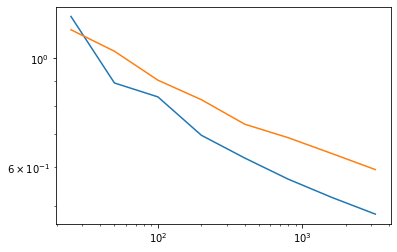

In [16]:
plt.loglog(points,H_RR_8)
plt.loglog(points,H_RR_8_wo_shape)

In [12]:
O_RBF[-1]

16.900893297507967

In [9]:
plt.figure(figsize=(4.2,2.6),dpi=300)
log_O_RBF_err = 0.434 * O_RBF_err/O_RBF
log_O_NN_err = 0.434 * O_NN_err/O_NN
log_O_RR_6_err = 0.434 * O_RR_6_err/O_RR_6

#log_points = np.log10(points)

plt.errorbar(log_points,np.log10(O_RBF),yerr=log_O_RBF_err,marker="o",label="KRR RBF",capsize=3,c="tab:orange")
plt.errorbar(log_points,np.log10(O_NN),yerr=log_O_NN_err,marker="o", label="NN",capsize=3,c="tab:blue")
plt.errorbar(log_points, np.log10(O_RR_6), yerr=log_O_RR_6_err,marker="o", label="RR",capsize=3,c="tab:green")



#plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.ylabel("RMSE [ppm]")
plt.xlabel("N Train")
plt.title("$^{17}$ O $\sigma_{iso}$ learning curve")
plt.savefig("log_O17_training_curve.png",dpi=300,bbox_inches="tight")

NameError: name 'log_points' is not defined

<Figure size 1260x780 with 0 Axes>

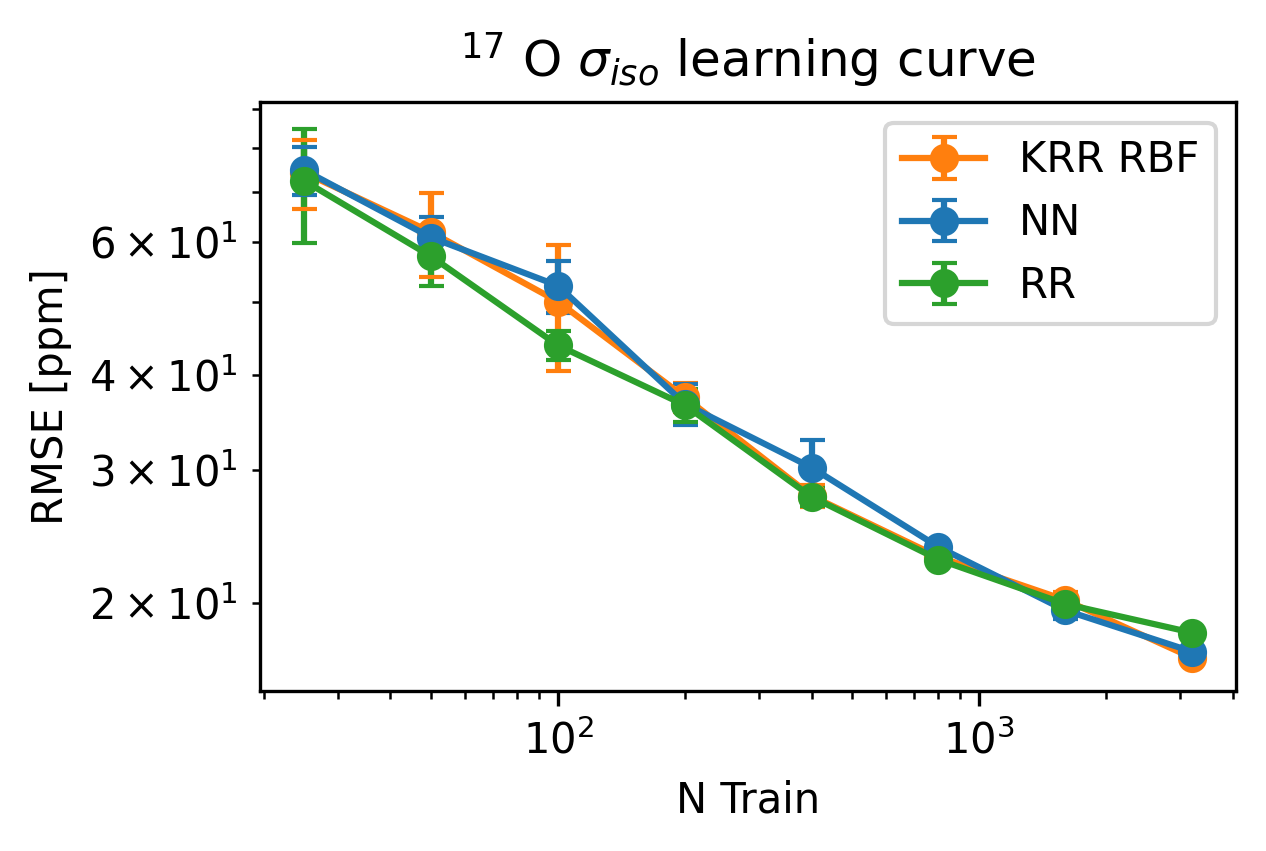

In [10]:
plt.figure(figsize=(4.2,2.6),dpi=300)
log_O_RBF_err = 0.434 * O_RBF_err/O_RBF
log_O_NN_err = 0.434 * O_NN_err/O_NN
log_O_RR_6_err = 0.434 * O_RR_6_err/O_RR_6

log_points = np.log10(points)

plt.errorbar(points,O_RBF,yerr=O_RBF_err,marker="o",label="KRR RBF",capsize=3,c="tab:orange")
plt.errorbar(points,O_NN,yerr=O_NN_err,marker="o", label="NN",capsize=3,c="tab:blue")
plt.errorbar(points, O_RR_6, yerr=O_RR_6_err,marker="o", label="RR",capsize=3,c="tab:green")



plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.ylabel("RMSE [ppm]")
plt.xlabel("N Train")
plt.title("$^{17}$ O $\sigma_{iso}$ learning curve")
plt.savefig("log_O17_training_curve.png",dpi=300,bbox_inches="tight")

In [65]:
this = np.array([1,2,3,4])

In [67]:
10 ** this

array([   10,   100,  1000, 10000])

In [56]:
log_O_RBF_err

array([0.0454817 , 0.05539562, 0.08245724, 0.01921151, 0.01410852,
       0.00584404, 0.01073753, 0.00802377])

Text(0.5, 1.0, '$^{17}$ O $\\sigma_{iso}$ learning curve')

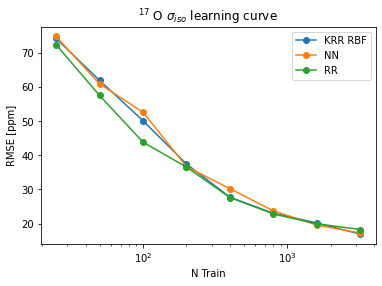

In [7]:
plt.plot(points,O_RBF,marker="o", label="KRR RBF")
plt.plot(points,O_NN,marker="o", label="NN")
plt.plot(points, O_RR_6, marker="o", label="RR")
plt.xscale("log")
plt.legend()
plt.ylabel("RMSE [ppm]")
plt.xlabel("N Train")
plt.title("$^{17}$ O $\sigma_{iso}$ learning curve")

Text(0.5, 1.0, '$^{15}$N $\\sigma_{iso}$ learning curve')

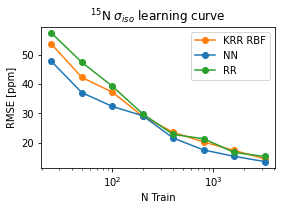

In [8]:
plt.figure(figsize=(4.2,2.6))
plt.plot(points,N_RBF,marker="o",label="KRR RBF",c="tab:orange")
plt.plot(points,N_NN,marker="o",label="NN",c="tab:blue")
plt.plot(points,N_RR_6,marker="o",label="RR",c="tab:green")
#plt.plot(points,N_RR_8,marker="o")
plt.xscale("log")
plt.legend()
plt.ylabel("RMSE [ppm]")
plt.xlabel("N Train")
plt.title("$^{15}$N $\sigma_{iso}$ learning curve")

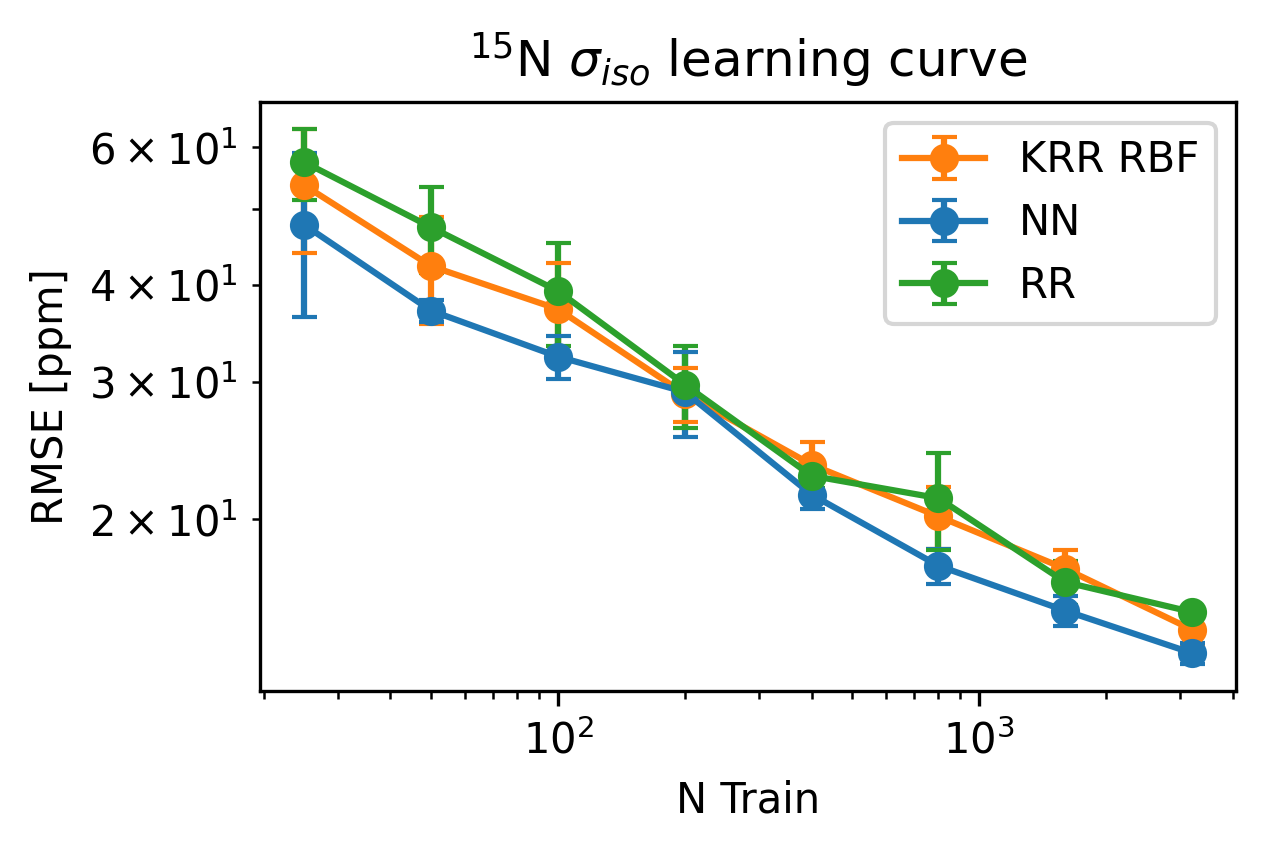

In [86]:
plt.figure(figsize=(4.2,2.6),dpi=300)
plt.errorbar(points,N_RBF,yerr=N_RBF_err,marker="o",label="KRR RBF",capsize=3,c="tab:orange")
plt.errorbar(points,N_NN,yerr=N_NN_err,marker="o",label="NN",capsize=3,c="tab:blue")
plt.errorbar(points,N_RR_6,yerr=N_RR_6_err, marker="o",label="RR",capsize=3,c="tab:green")
#plt.plot(points,N_RR_8,marker="o")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.ylabel("RMSE [ppm]")
plt.xlabel("N Train")
plt.title("$^{15}$N $\sigma_{iso}$ learning curve")
plt.savefig("log_N15_training_curve.png",dpi=300,bbox_inches="tight")

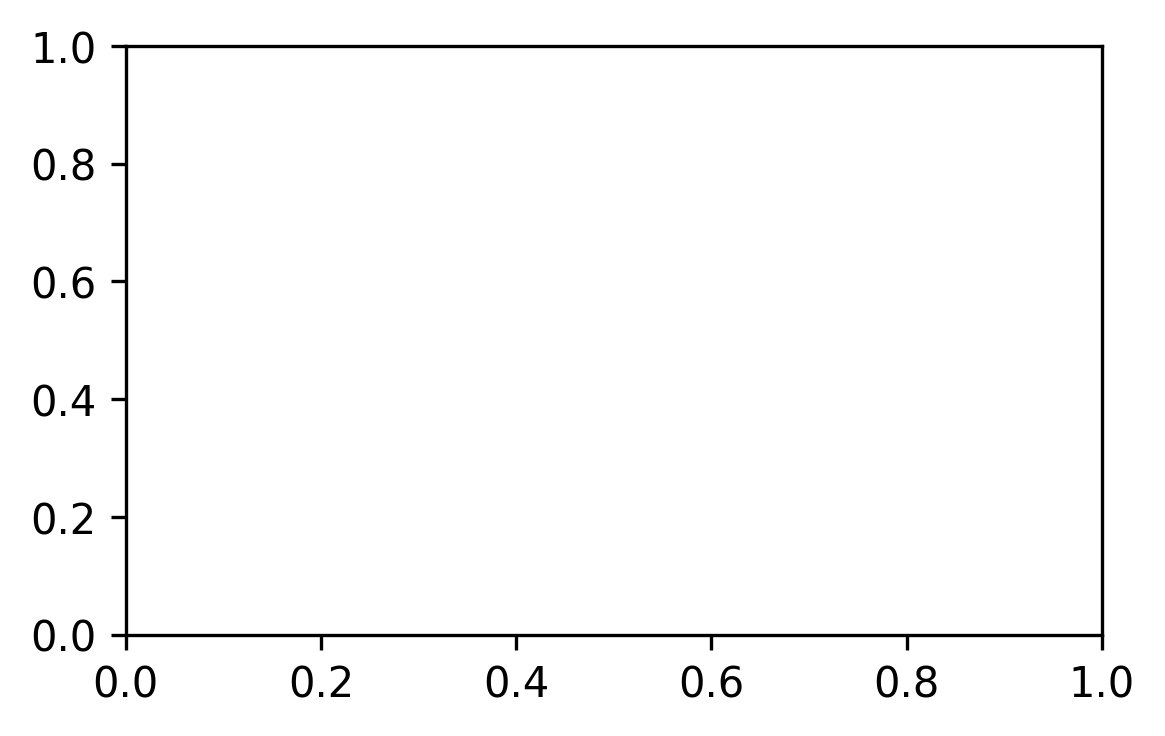

In [37]:
fig, ax = plt.subplots(figsize=(4.2,2.6),dpi=300)

In [40]:
import matplotlib.ticker as mticker

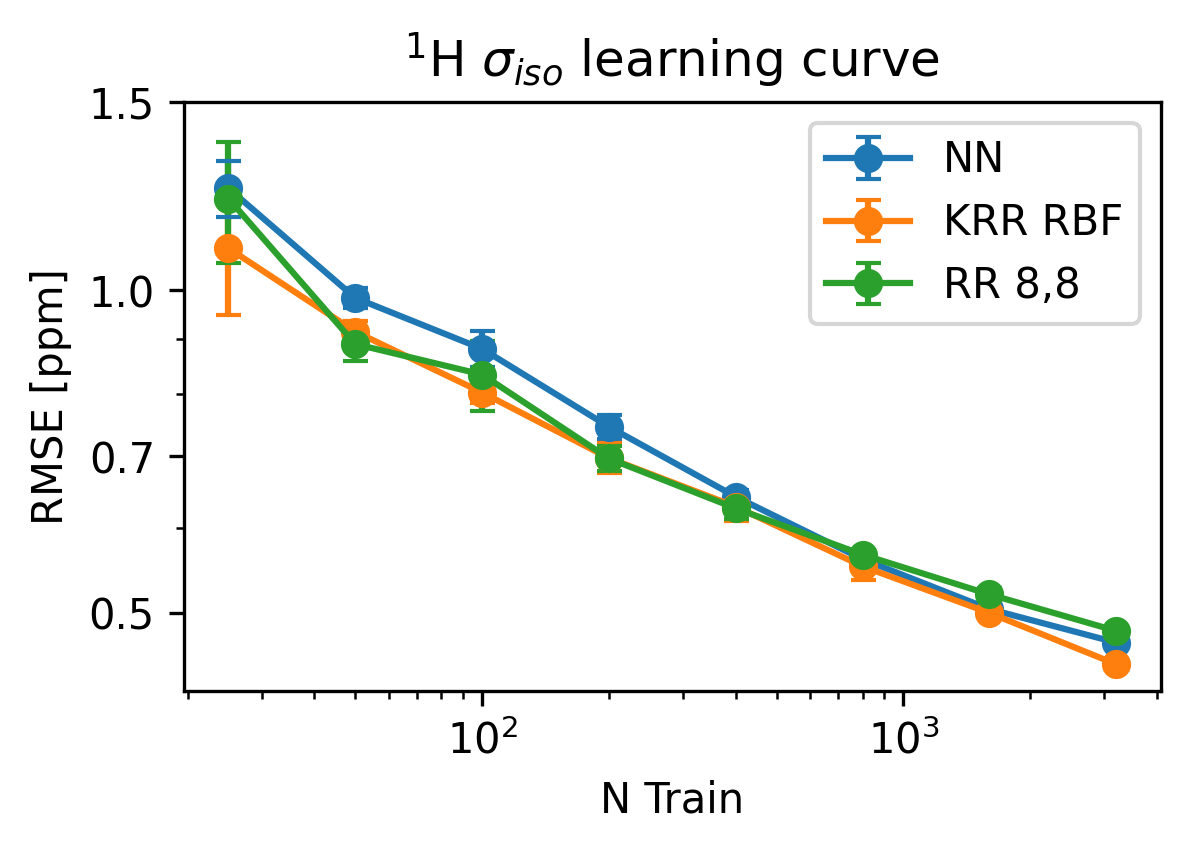

In [84]:
#plt.errorbar(points,N_RBF,yerr=N_RBF_err,marker="o",label="KRR RBF",capsize=3)
fig, ax = plt.subplots(figsize=(4.2,2.6),dpi=300)
ax.set_yticklabels([])
ax.set_yticks(ticks=[0.5,1.,1.5])
ax.errorbar(points,H_NN,yerr=H_NN_err,marker="o",label="NN",capsize=3,c="tab:blue")
ax.errorbar(points,H_RBF,yerr=H_RBF_err,marker="o",label="KRR RBF",capsize=3,c="tab:orange")
ax.errorbar(points,H_RR_8,yerr=H_RR_8_err, marker="o",label="RR 8,8",capsize=3,c="tab:green")
#plt.errorbar(points,H_RR_8,yerr=H_RR_8_err, marker="o",label="RR 8,8",capsize=3)
#plt.plot(points,N_RR_8,marker="o")
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()
ax.set_ylabel("RMSE [ppm]")
ax.set_xlabel("N Train")
ax.set_title("$^{1}$H $\sigma_{iso}$ learning curve")
ax.yaxis.set_major_formatter(mticker.NullFormatter())
ax.set_yticks(ticks=[])
ax.set_yticklabels([])
ax.set_yticks(ticks=[0.5,0.7,1.,1.5])
#ax.set_yticks([0.5, 0.75, 1, 1.25])
ax.minorticks_off()
ax.get_yaxis().set_major_formatter(mticker.ScalarFormatter())
ax.minorticks_on()
ax.yaxis.set_minor_formatter(mticker.NullFormatter())
#
#ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
#ax.yaxis.get_major_formatter().set_scientific(False)
#ax.yaxis.get_major_formatter().set_useOffset(False)
#ax.ticklabel_format(style='plain')
#plt.show()
plt.savefig("log_H1_training_curve.png",dpi=300,bbox_inches="tight")

In [11]:
H_RBF

array([1.0948619 , 0.91527924, 0.80310313, 0.69752831, 0.62851351,
       0.55283238, 0.50014299, 0.4479217 ])

In [12]:
C_RBF

array([12.81614414, 10.23114066,  7.86797378,  6.9359016 ,  5.71396981,
        4.93111588,  4.39501289,  3.92901525])

In [13]:
C_RBF_err

array([0.67870225, 1.05311406, 0.3133311 , 0.25069808, 0.17457624,
       0.12258357, 0.05882832, 0.01297205])

In [14]:
H_RBF

array([1.0948619 , 0.91527924, 0.80310313, 0.69752831, 0.62851351,
       0.55283238, 0.50014299, 0.4479217 ])

In [15]:
H_NN

array([1.24561578, 0.98408362, 0.88214779, 0.74609561, 0.64194543,
       0.56136796, 0.50430623, 0.46927981])

In [16]:
H_NN_err

array([0.07418818, 0.02139664, 0.03423162, 0.01931875, 0.00890872,
       0.0035604 , 0.00631942, 0.00346697])

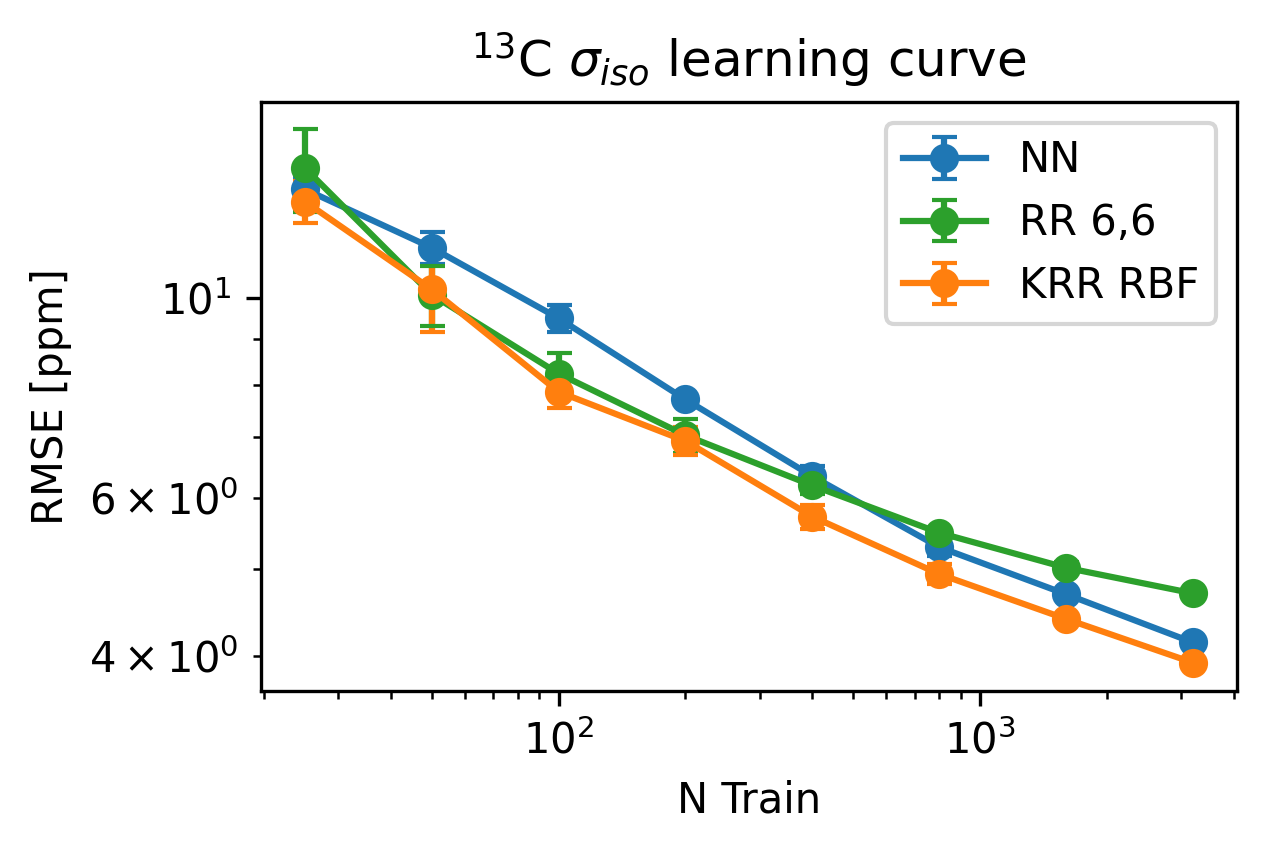

In [85]:
plt.figure(figsize=(4.2,2.6),dpi=300)
plt.errorbar(points,C_NN,yerr=C_NN_err,marker="o",label="NN",capsize=3)
plt.errorbar(points,C_RR_6,yerr=C_RR_6_err, marker="o",label="RR 6,6",capsize=3,c="tab:green")
plt.errorbar(points,C_RBF,yerr=C_RBF_err,marker="o",label="KRR RBF",capsize=3,c="tab:orange")
#plt.errorbar(points,C_RR_8,yerr=C_RR_8_err, marker="o",label="RR 8,8",capsize=3)
#plt.errorbar(points,H_RR_8,yerr=H_RR_8_err, marker="o",label="RR 8,8",capsize=3)
#plt.plot(points,N_RR_8,marker="o")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.ylabel("RMSE [ppm]")
plt.xlabel("N Train")
plt.title("$^{13}$C $\sigma_{iso}$ learning curve")
plt.savefig("log_C13_training_curve.png",dpi=300,bbox_inches="tight")

In [20]:
C_RBF

array([12.81614414, 10.23114066,  7.86797378,  6.9359016 ,  5.71396981,
        4.93111588,  4.39501289,  3.92901525])

In [21]:
H_RBF

array([1.0948619 , 0.91527924, 0.80310313, 0.69752831, 0.62851351,
       0.55283238, 0.50014299, 0.4479217 ])

In [22]:
N_RBF

array([53.65135311, 42.24768762, 37.22340307, 28.96865557, 23.50976852,
       20.18087872, 17.29207278, 14.4436816 ])

In [23]:
O_RBF

array([74.17187495, 61.8887534 , 50.07402854, 37.41452584, 27.68628638,
       22.99286466, 20.15568233, 16.9008933 ])

In [6]:
O_RBF = np.mean(O_RBF.reshape(-1,5),axis=1)

In [7]:
O_RBF

array([74.17187495, 61.8887534 , 50.07402854, 37.41452584, 27.68628638,
       22.99286466, 20.15568233, 16.9008933 ])